<a href="https://colab.research.google.com/github/gabo235/Evaluacion_2021-1/blob/main/Evaluacion_2021-1/1039474879/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Computational Methods
### Gabriel Cataño Sánchez

## $\textbf{Abbe Number of a Material}$

The Abbe number of a transparent optical material, named after the German physicist Ernst Abbe, is defined as:

\begin{equation}
V_D = \frac{n_D - 1}{n_F - n_C}
\end{equation}

This the ratio of the refractivity and the principal dispersion. It is also sometimes called the V-number, $V_D$ or the constringence.

The definition refers to refractive indices at three different standard spectral lines in the visible region, which can easily be produced with spectral lamps:
- $λ_F = 486.1$ nm (blue Fraunhofer F line from hydrogen)
- $λ_D = 589.2$ nm (orange Fraunhofer D line from sodium)
- $λ_C = 656.3$ nm (red Fraunhofer C line from hydrogen)

The middle one (from the sodium D line) lies in the region of maximum sensitivity of the human eye.


### $\textbf{The Project}$

The purpose of this project is to meassure the Abbe number of different fluids, such as water, oil and alcohol, to acomplish the goal, we must first meassure the refractive indices of the fluids for three different wavelengths of monochromatic light. To meassure the refractive index easily, is used the fenomenom of light diffraction by a diffraction grating, for this project was use a CD as diffraction grating, a transparent rectangular container, three laser pointers, millimeter sheet, a camera and the fluids, then we need to meassure the distance between the diffracted order $m = 0$, and the diffracted order $m = \pm 1$, this is made when the container is empty as well as when is filled whith any of the fluids.

\\
After the distances needed are meassured, the refractive index can be obtained with the next equation.

\begin{align}
n = \frac{y_{empty}}{y_{fluid}}
\end{align}

Where $y_{empty}$ represents the meassured distance when the container is empty, and $y_{fluid}$ is the meassured distance when the container is filled with the fluid. The distances were meassured by taking a photo to the diffracted orders and then upload the photo to an image editor, with the program's rule got the meassure in pixels, thus the results would be better.

\\
In the next code, is shown the results of the refractive indices for each one of the fluids and for the different wavelengths, then the experimental data is fitted with the Cauchy's equation, which is given as:

\begin{equation}
n(\lambda) = A + \frac{B}{\lambda ^2}
\end{equation}

$A$ and $B$ are constants, and $\lambda $ is the wavelength, the equation represents a relation between the refractive index and the wavelength. The purpose of the fit is to obtain the refractive indices for the Fraunhofer spectral lines, $n_D, n_F$ and $n_C$. Then with the refractive indices we can calculate the Abbe number of the fluid with the very first equation that was shown above.

\\
In the code also is developed the propagation of uncertainty, so the final result will be presented as a central  value and its repective uncertainty.

## $\textbf{Code}$

In [45]:
# Libraries

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import sympy as sp
from scipy import stats
from scipy.optimize import curve_fit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'plt', 're']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## $\textbf{Water}$

In [46]:
# Laser pointers wavelengths used in the project
W = np.array([405,532,650])

# Rafractive indices of water for each wavelength
R = np.array([1.34947,1.34161,1.33747]) 

# Experimental uncertainty for the refractive indices
er = np.array([0.0065, 0.0043,0.0034])
dat = {"W": W, "R":R, "Er": er }

# DataFrame with the experimental data
d = pd.DataFrame(dat)
d

,W,R,Er
0,405,1.34947,0.0065
1,532,1.34161,0.0043
2,650,1.33747,0.0034


In [47]:
# Cauchy's equation, this for the fitting
def n(l,A,B):
  """
  Function that relates the refractive index of a material with the wavelength of a light beam.
  Input:
    l : Wavelength of the light beam.
    A : Coefficient 1.
    B : Coefficient 2.

  Output:
    n(l) : Refractive index of the associated wavelength.

  """
  return A + B/l**2 

In [48]:
# Fit of the data with the equation
l = d['W']
r = d['R']
f, pcov1 = curve_fit(n,l,r, sigma=d['Er'])

# Values of A & B that best fit with the data
f

array([1.32991841e+00, 3.23683558e+03])

In [49]:
# Uncertainty of the parameters A & B
err1 = np.sqrt(np.diag(pcov1))
err1

array([5.01773801e-04, 1.42398736e+02])

In [50]:
# Values of A & B
A_ = f[0]
B_ = f[1]

In [51]:
# Refractive indices for the Fraunhofer spectral lines
re = n(656.3, A_, B_)
ye = n(589.3, A_, B_)
bl = n(486.1, A_, B_)

print(f'Refractive index of red in Water: {round(re,4)}\n Refractive index of yellow in Water: {round(ye,4)}')
print(f'Refractive index of blue in Water: {round(bl,4)} ')

Refractive index of red in Water: 1.3374
 Refractive index of yellow in Water: 1.3392
Refractive index of blue in Water: 1.3436 


In [52]:
# Abbe number of water
V = (ye - 1)/(bl - re)
print(f'Abbe number of Water, VD: {round(V,4)}')

Abbe number of Water, VD: 54.861


(380.0, 680.0)

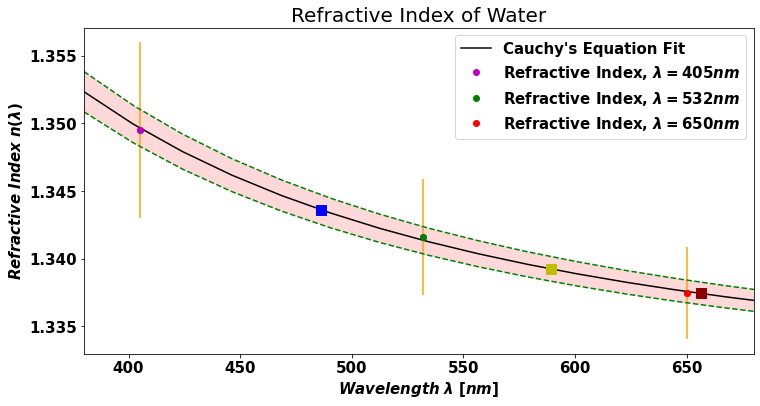

In [53]:
# Graph of the data and the fit

font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(12,6)) 
fig.subplots_adjust(wspace=.2)
################################################

# Cauchy's equation fit with its respective parameters uncertainty, three curves will be shown
w_ = np.linspace(380,800, 20)
ya = n(w_,A_,B_)
y1a = n(w_,A_+err1[0], B_+err1[1])
y2a = n(w_,A_-err1[0], B_-err1[1])

plt.plot(d['W'], d['R'], 'o')
plt.plot(w_, ya, 'k-', label="Cauchy's Equation Fit")
plt.plot(w_, y1a, 'g--')
plt.plot(w_, y2a, 'g--')
plt.fill_between(w_, y1a, y2a, facecolor="red", alpha=0.15)

# Experimental Data with its error bars
plt.errorbar(d['W'][0],d['R'][0], yerr= d['Er'][0], color ='orange')
plt.plot(d['W'][0], d['R'][0], 'mo', label = "Refractive Index, $\\lambda = 405 nm$")
plt.errorbar(d['W'][1],d['R'][1], yerr= d['Er'][1], color= 'orange')
plt.plot(d['W'][1], d['R'][1], 'go', label = "Refractive Index, $\\lambda = 532 nm$")
plt.errorbar(d['W'][2],d['R'][2], yerr= d['Er'][2], color= 'orange')
plt.plot(d['W'][2], d['R'][2], 'ro', label = "Refractive Index, $\\lambda = 650 nm$")

# Refractive indices for the Fraunhofer spectral lines
plt.plot(656.3, re, 's', color = 'darkred',  markersize=10)
plt.plot(589.3, ye, 'ys', markersize=10)
plt.plot(486.1, bl, 'bs',  markersize=10)

# Labeling
plt.title("Refractive Index of Water", size = 20)
plt.xlabel('$Wavelength$ $\lambda$ $[nm]$')
plt.ylabel('$Refractive$ $Index$ $n(\lambda)$')
plt.legend()
plt.xlim(380,680)

## $\textbf{Rubbing Alcohol}$

In [54]:
# Laser pointers wavelengths used in the project
W = W

# Rafractive indices of rubbing alcohol for each wavelength
Rh = np.array([1.39555, 1.38636, 1.38266])

# Experimental uncertainty for the refractive indices
erh = np.array([0.0072,0.0058,0.0039])
dath = {"W": W, "R": Rh, "Er": erh}

# DataFrame with the experimental data
dh = pd.DataFrame(dath) 
dh

,W,R,Er
0,405,1.39555,0.0072
1,532,1.38636,0.0058
2,650,1.38266,0.0039


In [55]:
# Fit of the data with the equation
L = dh['W']
y = dh['R']
fh, pcov2 = curve_fit(n,L,y, sigma=erh)

# Values of A & B that best fit with the data
fh

array([1.37443112e+00, 3.44484176e+03])

In [56]:
# Uncertainty of the parameters A & B
err2 = np.sqrt(np.diag(pcov2))
err2

array([3.80146086e-04, 1.06710986e+02])

In [57]:
# Values of A & B
Ah = fh[0]
Bh = fh[1]


In [58]:
# Refractive indices for the Fraunhofer spectral lines
reh = n(656.3,Ah,Bh)
yeh = n(589.3,Ah,Bh)
blh = n(486.1,Ah,Bh)

print(f'Refractive index of red in Alcohol: {round(reh,4)}\n Refractive index of yellow in Alcohol: {round(yeh,4)}')
print(f'Refractive index of blue in Alcohol: {round(blh,4)} ')

Refractive index of red in Alcohol: 1.3824
 Refractive index of yellow in Alcohol: 1.3844
Refractive index of blue in Alcohol: 1.389 


In [59]:
# Abbe number of water
Va = (yeh - 1)/(blh - reh)
print(f'Abbe number of Rubbing Alcohol, Va: {round(Va,4)}')

Abbe number of Rubbing Alcohol, Va: 58.4032


(380.0, 700.0)

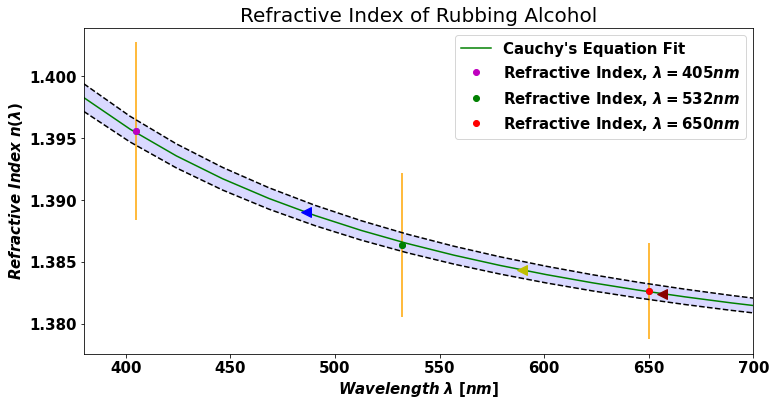

In [60]:
# Graph of the data and the fit

font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(12,6)) 
fig.subplots_adjust(wspace=.2)
################################################

# Cauchy's equation fit with its respective parameters uncertainty, three curves will be shown
Ah = fh[0]
Bh = fh[1]
w_ = np.linspace(380,800, 20)
yh = n(w_,Ah,Bh)
y1h = n(w_,Ah+err2[0], Bh+err2[1])
y2h = n(w_,Ah-err2[0], Bh-err2[1])

plt.plot(dh['W'], dh['R'], 'o')
plt.plot(w_, yh, 'g-', label="Cauchy's Equation Fit")
plt.plot(w_, y1h, 'k--')
plt.plot(w_, y2h, 'k--')
plt.fill_between(w_, y1h, y2h, facecolor="blue", alpha=0.15)

# Experimental Data with its error bars
plt.errorbar(dh['W'][0],dh['R'][0], yerr= dh['Er'][0], color ='orange')
plt.plot(dh['W'][0], dh['R'][0], 'mo', label = "Refractive Index, $\\lambda = 405 nm$")
plt.errorbar(dh['W'][1],dh['R'][1], yerr= dh['Er'][1], color ='orange')
plt.plot(dh['W'][1], dh['R'][1], 'go', label = "Refractive Index, $\\lambda = 532 nm$")
plt.errorbar(dh['W'][2],dh['R'][2], yerr= dh['Er'][2], color ='orange')
plt.plot(dh['W'][2], dh['R'][2], 'ro', label = "Refractive Index, $\\lambda = 650 nm$")

# Refractive indices for the Fraunhofer spectral lines
plt.plot(656.3, reh, '<', color = 'darkred',  markersize=10)
plt.plot(589.3, yeh, 'y<', markersize=10)
plt.plot(486.1, blh, 'b<',  markersize=10)

# Labeling
plt.title("Refractive Index of Rubbing Alcohol", size = 20)
plt.xlabel('$Wavelength$ $\lambda$ $[nm]$')
plt.ylabel('$Refractive$ $Index$ $n(\lambda)$')
plt.legend()
plt.xlim(380,700)

## $\textbf{Sunflower Oil}$

In [61]:
# Laser pointers wavelengths used in the project
W = W

# Rafractive indices of sunflower oil for each wavelength
RO = np.array([1.5047,1.4885, 1.4829])

# Experimental uncertainty for the refractive indices
erO = np.array([0.00620,0.00496,0.00392])
datO = {"W": W, "R": RO, "Er": erO}

# DataFrame with the experimental data
dO = pd.DataFrame(datO) 
dO

,W,R,Er
0,405,1.5047,0.00620
1,532,1.4885,0.00496
2,650,1.4829,0.00392


In [62]:
# Fit of the data with the equation
LO = dO['W']
yO = dO['R']
fO, pcov3 = curve_fit(n,LO,yO,sigma=erO)

# Values of A & B that best fit with the data
fO

array([1.46873669e+00, 5.83148448e+03])

In [63]:
# Uncertainty of the parameters A & B
err3 = np.sqrt(diag(pcov3)) 
err3

array([1.49810311e-03, 4.00973055e+02])

In [64]:
# Values of A & B
AO = fO[0]
BO = fO[1]

In [65]:
# Refractive indices for the Fraunhofer spectral lines
reO = n(656.3,AO,BO)
yeO = n(589.3,AO,BO)
blO = n(486.1,AO,BO)

print(f'Refractive index of red in Oil: {round(reO,4)}\n Refractive index of yellow in Oil: {round(yeO,4)}') 
print( f'Refractive index of blue in Oil: {round(blO,4)} ')

Refractive index of red in Oil: 1.4823
 Refractive index of yellow in Oil: 1.4855
Refractive index of blue in Oil: 1.4934 


In [66]:
# Abbe number of water
VO = (yeO - 1)/(blO - reO)
print(f'Abbe number of sunflower Oil, VO: {round(VO,4)}')

Abbe number of sunflower Oil, VO: 43.5827


(380.0, 700.0)

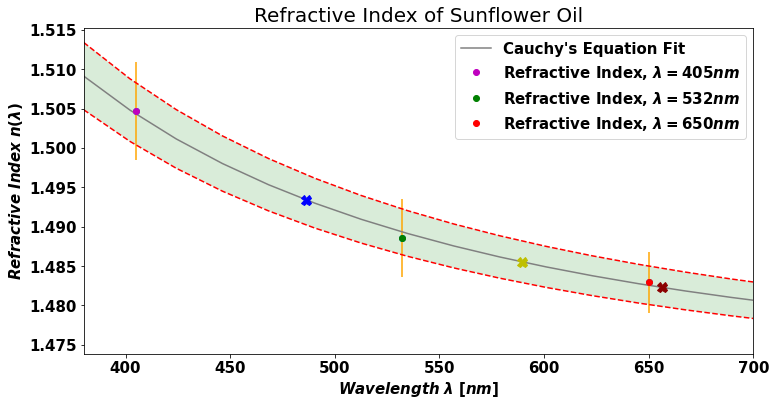

In [67]:
# Graph of the data and the fit

font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(12,6)) 
fig.subplots_adjust(wspace=.2)
################################################

# Cauchy's equation fit with its respective parameters uncertainty, three curves will be shown
w_ = np.linspace(380,800, 20)
yO = n(w_,AO,BO)
y1O = n(w_,AO+err3[0], BO+err3[1])
y2O = n(w_,AO-err3[0], BO-err3[1])

plt.plot(dO['W'], dO['R'], 'o')
plt.plot(w_, yO, '-', color='gray', label="Cauchy's Equation Fit")
plt.plot(w_, y1O, 'r--')
plt.plot(w_, y2O, 'r--')
plt.fill_between(w_, y1O, y2O, facecolor="g", alpha=0.15)

# Experimental Data with its error bars
plt.errorbar(dO['W'][0],dO['R'][0], yerr= dO['Er'][0], color ='orange')
plt.plot(dO['W'][0], dO['R'][0], 'mo', label = "Refractive Index, $\\lambda = 405 nm$")
plt.errorbar(dO['W'][1],dO['R'][1], yerr= dO['Er'][1], color ='orange')
plt.plot(dO['W'][1], dO['R'][1], 'go', label = "Refractive Index, $\\lambda = 532 nm$")
plt.errorbar(dO['W'][2],dO['R'][2], yerr= dO['Er'][2], color ='orange')
plt.plot(dO['W'][2], dO['R'][2], 'ro', label = "Refractive Index, $\\lambda = 650 nm$")

# Refractive indices for the Fraunhofer spectral lines
plt.plot(656.3, reO, 'X', color = 'darkred',  markersize=10)
plt.plot(589.3, yeO, 'yX', markersize=10)
plt.plot(486.1, blO, 'bX',  markersize=10)

# Labeling
plt.title("Refractive Index of Sunflower Oil", size = 20)
plt.xlabel('$Wavelength$ $\lambda$ $[nm]$')
plt.ylabel('$Refractive$ $Index$ $n(\lambda)$')
plt.legend()
plt.xlim(380,700)

## $\textbf{Propagation of Uncertainty}$

The propagation of uncertainty for the refractive indices values found with the Cauchy's equation fit, will be find with the equation:
$$
\delta n = \sqrt{(dA)^{2} + (dB)^{2}\cdot (\frac{1}{\lambda ^{2}})^{2}}
$$

Where   $dA$ is the uncertainty of the $A$ coefficient in the Cauchy's equation, $dB$ is the uncertainty of the $B$ coefficient in the Cauchy's equation and $\lambda$ is the wavelength.

In [68]:
# Function 
def Delta_n(w,dA,dB):
  """"
  Function that calculates the propagation of uncertainty of the refractive index of a material, given
  the Cauchy's equation for the relation between the refractive index and the wavelength.
  --------------------------
  Input: 
    w: Wavelength of the ray source.
    dA: Uncertainty of the A coefficient in the Cauchy's equation.
    dB: Uncertainty of the B coefficient in the Cauchy's equation.

  Output:
    Dn: Uncertainty of the refractive index associated to the Cauchy's equation.
  ---------------------------
  """

  return np.sqrt(dA**2 + (dB**2)*(1/w**2)**2)

The propagation of uncertainty for the Abbe number of each material, is given by the equation:
$$
\delta V_D= \frac{1}{n_F - n_C}\sqrt{(dn_D)^{2}+ (dn_F)^{2}\cdot(\frac{1-n_D}{n_F - n_C})^{2}+ (dn_C)^{2}\cdot (\frac{n_D -1}{n_F - n_C})^{2}}
$$

Where $n_F, n_C $  and $n_D$, are  the refractive indices for Blue, Red and Yellow  respectively, for the Fraunhofer spectral lines. $dn_D$ is the uncertainty of the Refractive index for the Yellow Ray, $dn_F$ is the uncertainty of the Refractive index for the Blue Ray and $dn_C$ is the uncertainty of the Refractive index for the Red Ray.

In [69]:
# Function
def Delta_V(nF,nC,nD,dnD,dnF,dnC):
  """"
  Function that calculates the propagation of uncertainty of the Abbe number of a material, given
  the Abbe's equation for the relation between the refractive indices for the Fraunhofer spectral lines.
  --------------------------
  Input: 
    nF: Refractive index of Blue in the Fraunhofer spectral lines.
    nC: Refractive index of Red in the Fraunhofer spectral lines.
    nD: Refractive index of Yellow in the Fraunhofer spectral lines.
    dnD: Uncertainty of the Refractive index of Yellow Ray.
    dnF: Uncertainty of the Refractive index of Blue Ray.
    dnC: Uncertainty of the Refractive index of Red Ray.
    

  Output:
    dV: Uncertainty of the Abbe number associated to the Abbe's equation.
  ---------------------------
  """

  return (1/(nF-nC))* np.sqrt(dnD**2 + (dnF**2)*((1-nD)/(nF-nC))**2 + (dnC**2)*((nD-1)/(nF-nC))**2)

In [70]:
# Uncertainty of the parameters A & B, Water
pcov1 = pcov1
err1 = np.sqrt(np.diag(pcov1))
err1

array([5.01773801e-04, 1.42398736e+02])

In [71]:
# Uncertainty of the parameters A & B, Alcohol
pcov2 = pcov2
err2 = np.sqrt(np.diag(pcov2))
err2

array([3.80146086e-04, 1.06710986e+02])

In [72]:
# Uncertainty of the parameters A & B, Oil
pcov3 = pcov3
err3 = np.sqrt(np.diag(pcov3))
err3

array([1.49810311e-03, 4.00973055e+02])

In [73]:
# Fraunhofer lines wavelengths
D = 589.3   ## nm
F = 486.1   ## nm
C = 656.3   ## nm

# Water refractive indices for the Fraunhofer spectral lines  
re = n(C, A_, B_)
ye = n(D, A_, B_)
bl = n(F, A_, B_)

# Rubbing Alcohol refractive indices for the Fraunhofer spectral lines
reh = n(C, Ah,Bh)
yeh = n(D, Ah,Bh)
blh = n(F, Ah,Bh)

# Sunflower Oil refractive indices for the Fraunhofer spectral lines
reO = n(C,AO,BO)
yeO = n(D,AO,BO)
blO = n(F,AO,BO)

# Water refractive index propagation of uncertainty 
dnDWt = Delta_n(D,err1[0],err1[1])
dnFWt = Delta_n(F,err1[0],err1[1])
dnCWt = Delta_n(C,err1[0],err1[1])

# Rubbing Alcohol refractive index propagation of uncertainty 
dnDAl = Delta_n(D,err2[0],err2[1])
dnFAl = Delta_n(F,err2[0],err2[1])
dnCAl = Delta_n(C,err2[0],err2[1])

# Sunflower oil refractive index propagation of uncertainty 
dnDO = Delta_n(D,err3[0],err3[1])
dnFO = Delta_n(F,err3[0],err3[1])
dnCO = Delta_n(C,err3[0],err3[1])

# Water  Abbe number propagation of uncertainty

dVWt = Delta_V(bl,re,ye,dnDWt,dnFWt,dnCWt)

# Rubbing Alcohol  Abbe number propagation of uncertainty  

dVAl = Delta_V(blh,reh,yeh,dnDAl,dnFAl,dnCAl)

# Sunflower oil  Abbe number propagation of uncertinty 
dVO = Delta_V(blO,reO,yeO,dnDO,dnFO,dnCO)

print(f'Uncertainty Refractive Indices of Yellow, Blue and Red in Water: {round(dnDWt, 4),round(dnFWt,4),round(dnCWt,4)}')
print(f'Uncertainty Refractive Indices of Yellow, Blue and Red in Rubbing Alcohol: {round(dnDAl,4),round(dnFAl,4),round(dnCAl,4)}')
print(f'Uncertainty Refractive Indices of Yellow, Blue and Red in Sunflower Oil: {round(dnDO,4),round(dnFO,4),round(dnCO,4)}')
print(f'Uncertainty Abbe Number of Water: {round(dVWt,2)}')
print(f'Uncertainty Abbe Number of Rubbing Alcohol: {round(dVAl,2)}')
print(f'Uncertainty Abbe Number of Sunflower Oil: {round(dVO,2)}')
print(f'Abbe Number of Water: {round(V,2)}')
print(f'Abbe Number of Rubbing Alcohol: {round(Va,2)}')
print(f'Abbe Number of Sunflower Oil: {round(VO,2)}')

Uncertainty Refractive Indices of Yellow, Blue and Red in Water: (0.0006, 0.0008, 0.0006)
Uncertainty Refractive Indices of Yellow, Blue and Red in Rubbing Alcohol: (0.0005, 0.0006, 0.0005)
Uncertainty Refractive Indices of Yellow, Blue and Red in Sunflower Oil: (0.0019, 0.0023, 0.0018)
Uncertainty Abbe Number of Water: 8.77
Uncertainty Abbe Number of Rubbing Alcohol: 6.61
Uncertainty Abbe Number of Sunflower Oil: 11.23
Abbe Number of Water: 54.86
Abbe Number of Rubbing Alcohol: 58.4
Abbe Number of Sunflower Oil: 43.58


## $\textbf{Results}$


| Fluid | Abbe Number | Uncertainty |
| :- | -: | :-: |
| Water | 54.86 | $\pm$ 8.77 |
| Rubbing Alcohol  | 58.40 | $\pm$ 6.61 |
|Sunflower Oil| 43.58 | $\pm$ 11.23 |



As resuts are shown above, it can be seen that the material with a higher abbe number is the rubbing alcohol, this means that rubbing alcohol has a less dispersion of light, on the other hand sunflower oil disperses more the light, low abbe number, if the fluids are observed it is notice that water and alcohol are more transparents than oil.

\\
The Abbe number is important in optics because with this number is determined the quality of materials use for the construction optics dispositives like lens.

#### $\textbf{References}$

- Abbe Number: https://www.rp-photonics.com/abbe_number.html
- Cauchy's Equation: https://en.wikipedia.org/wiki/Cauchy%27s_equation